## <p style="text-align: center;">MIS 284N - Big Data and Distributed Programming</p>
## <p style="text-align: center;">Project 3 - Machine Learning using Tensorflow and Google Colab</p>
## <p style="text-align: center;">Total points: 100</p>
## <p style="text-align: center;">Due: Sunday, October 20th submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

This project is about giving exposure about Tensorflow, its usage, Cloud services and help us in understanding the time taken to run computation on CPU and GPU. 

In this Project, we will work with CIFAR10 image dataset. 
The starter code to download the dataste using keras is given below. 
You should run this project on Google Colab. You would be using CPU, GPU.
Use tensorflow version 2.0. 

# In every line of code, please write a comment to briefly explain what that line is doing.
Your grades will be based on your understanding of the code you write! 

Note: The code you write should be your own!

## Zhuo Wen - zw6289
## Sharang Wakankar - sw37284

# Task 1
Convert the features in a form that can be given as input to tensorflow library/functions

In this task you will perform data augmentation. That is, pre-process the data to make the model more robust. Most common data augmentation techniques are rotation, flips and histogram equalization. 
You can choose an augmentation technique of your choice. 

In [0]:
# import packages and libraries for project
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [0]:
print(tf.__version__)
# GPU device is not found if tensorflow version is 2.0
# use tf version 1.15

1.15.0-rc3


In [0]:
# verify that GPU device is available
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data() # load the cifar10 data and split into test and train
print('x_train shape:', x_train.shape)

#check number of samples and the shape of the data
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


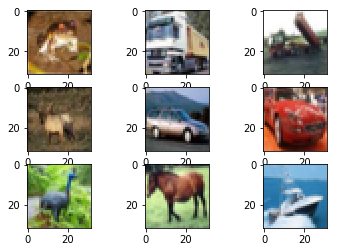

In [0]:
# show the first nine images from training data
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i])
# show the figure
plt.show()

In [0]:
datagen = ImageDataGenerator() # image preprocessing class used for data augmentation
x_train_transform = []  # to hold the new transformed training data

# create new training data with the augmentation applied on original training data
for i in range(len(x_train)):
  x_train_image = datagen.apply_transform(x_train[i], {'flip_horizontal':True})  # randomly flip images horizontally
  x_train_transform.append(x_train_image) # add the flipped images to the empty list

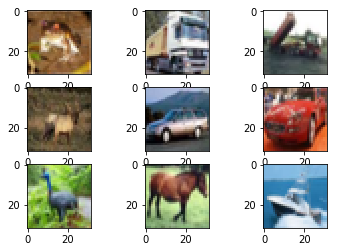

In [0]:
# show the first nine images from flipped images training data 
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train_transform[i])
# show the figure
plt.show()

In [0]:
new_x_train = np.append(x_train, x_train_transform, axis = 0) # combine original training data with the augmented data
new_x_train.shape

(100000, 32, 32, 3)

In [0]:
new_y_train = np.append(y_train, y_train, axis = 0) # combine original training data twice to match the number of samples in new x training data
new_y_train.shape

(100000, 1)

# Task 2
Try to build a Neural Network model, train on the features and report the accuracy.
Report your observations on the time taken on GPU and TPUs. 



1.   Create a CNN based model with 5 hidden layers and 100 hidden units each layer. 
2.   Create an LSTM based model with 2 hidden layers and 1024 hidden units in each layer. 



In [0]:
# create a CNN based model
def create_model():
  model = tf.keras.models.Sequential() # allows you to easily stack sequential layers of the network in order from input to output
  
  model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))  # use input shape 32,32,3
  # 100 units, 5 X 5 is the size of the filter, use Exponential Linear Unit activation function 
  model.add(tf.keras.layers.Conv2D(100, (5, 5), padding='same', activation='elu')) 
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # add a 2D max pooling layer and specify the size of the pooling in the x and y directions
  model.add(tf.keras.layers.Dropout(0.25)) # add a new Dropout layer between the input (or visible layer) and the first hidden layer
  # The dropout rate is set to 25%, meaning 1 in 4 inputs will be randomly excluded from each update cycle

  # identical logic for the below four layers
  model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
  model.add(tf.keras.layers.Conv2D(100, (5, 5), padding='same', activation='elu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
  model.add(tf.keras.layers.Conv2D(100, (5, 5), padding='same', activation='elu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.25))
  
  model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
  model.add(tf.keras.layers.Conv2D(100, (5, 5), padding='same', activation='elu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
  model.add(tf.keras.layers.Conv2D(100, (5, 5), padding='same', activation='elu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.25))


  model.add(tf.keras.layers.Flatten()) # flatten the output from the convolutional layers to enter our fully connected layers
  model.add(tf.keras.layers.Dense(256)) # declare fully connected layers using Dense and specify the size
  model.add(tf.keras.layers.Activation('elu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(10)) # dense to number of labels
  model.add(tf.keras.layers.Activation('softmax')) 
  
  return model

In [0]:
model = create_model() # create the model defined above

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile( 
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3,), # use the Adam optimizer
    loss='sparse_categorical_crossentropy',  # use the sparse categorical cross entropy for categorical class classification
    metrics=['sparse_categorical_accuracy']) # only interested in accuracy as metric

In [0]:
# %%time
import time
t0 = time.time()
model.fit(new_x_train, new_y_train, 
          batch_size=128, 
          epochs=10,
          validation_data=(x_test, y_test)) # fit model using update x and y training data
t1 = time.time()
timeTaken = t1-t0
print("time taken: " + str(timeTaken) + " seconds")

Train on 100000 samples, validate on 10000 samples
Epoch 1/10
100000/100000 [==============================] - 44s 436us/sample - loss: 1.0958 - sparse_categorical_accuracy: 0.6101 - val_loss: 0.8241 - val_sparse_categorical_accuracy: 0.7071
Epoch 2/10
100000/100000 [==============================] - 43s 430us/sample - loss: 0.8248 - sparse_categorical_accuracy: 0.7146 - val_loss: 0.7284 - val_sparse_categorical_accuracy: 0.7446
Epoch 3/10
100000/100000 [==============================] - 43s 430us/sample - loss: 0.7079 - sparse_categorical_accuracy: 0.7576 - val_loss: 0.6006 - val_sparse_categorical_accuracy: 0.7933
Epoch 4/10
100000/100000 [==============================] - 43s 431us/sample - loss: 0.6326 - sparse_categorical_accuracy: 0.7839 - val_loss: 0.6109 - val_sparse_categorical_accuracy: 0.7880
Epoch 5/10
100000/100000 [==============================] - 43s 430us/sample - loss: 0.5756 - sparse_categorical_accuracy: 0.8028 - val_loss: 0.5897 - val_sparse_categorical_accuracy: 0

## The time required to run 10 epochs on CNN model on CPU: 2024.59 seconds or approximately 33 min.

## The time required to run 10 epochs on CNN model on GPU: 430.87 seconds or approximately 7 min.

In [0]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 3s 282us/sample - loss: 0.5267 - sparse_categorical_accuracy: 0.8288
Test loss: 0.5267394819498062
Test accuracy: 0.8288


## The accuracy rate of cnn model after 5 epochs is about 82.9%.

In [0]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'] # get the information on labels from cifar10 data website
num_classes = len(class_names)
new_y_train = keras.utils.to_categorical(new_y_train, num_classes)  # turn each y train value to a vector based on its index in the class_names 
y_test = keras.utils.to_categorical(y_test, num_classes) # turn each y test value to a vector based on the index in class_names array

# normalize the value of pixel to something between 0 and 1
new_x_train = new_x_train.astype('float32') / 255.0 
x_test = x_test.astype('float32') / 255.0

In [0]:
# data reshaphing: flatten then reshape the x data to 3 dimensions so that it can be passed in the LSTM model
new_x_train_lstm = np.asarray(new_x_train.flatten()).reshape(100000,1,3072)
new_x_test_lstm = np.asarray(x_test.flatten()).reshape(10000,1,3072)

In [0]:
new_x_train_lstm.shape

(100000, 1, 3072)

In [0]:
# build a LSTM model

lstm_model = tf.keras.models.Sequential() # again use sequential model to stack layers
# 1024 units, return sequence true: return one output for each input time step and provide a 3D array
lstm_model.add(tf.keras.layers.LSTM(1024,input_shape=new_x_train_lstm.shape[1:],return_sequences=True)) 

lstm_model.add(tf.keras.layers.LSTM(1024))

lstm_model.add(keras.layers.Dense(10, activation='sigmoid')) # 10 labels in the first layer and use sigmoid function

lstm_model.compile(loss='binary_crossentropy',
            optimizer='adam', # adam optimizer
            metrics=['accuracy']) # only get accuracy metric from model

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 1024)           16781312  
_________________________________________________________________
lstm_1 (LSTM)                (None, 1024)              8392704   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 25,184,266
Trainable params: 25,184,266
Non-trainable params: 0
_________________________________________________________________


In [0]:
## fit the lstm model using the reshaped training data
import time
t0 = time.time()
lstm_model.fit(new_x_train_lstm, new_y_train, batch_size=100, epochs=10,validation_data=(new_x_test_lstm, y_test))
t1 = time.time()
timeTaken = t1-t0
print("time taken: " + str(timeTaken) + " seconds")

Train on 100000 samples, validate on 10000 samples
Epoch 1/10
100000/100000 [==============================] - 35s 350us/sample - loss: 0.2318 - acc: 0.9118 - val_loss: 0.2356 - val_acc: 0.9114
Epoch 2/10
100000/100000 [==============================] - 35s 350us/sample - loss: 0.2282 - acc: 0.9130 - val_loss: 0.2292 - val_acc: 0.9131
Epoch 3/10
100000/100000 [==============================] - 35s 348us/sample - loss: 0.2251 - acc: 0.9140 - val_loss: 0.2315 - val_acc: 0.9121
Epoch 4/10
100000/100000 [==============================] - 35s 349us/sample - loss: 0.2222 - acc: 0.9151 - val_loss: 0.2227 - val_acc: 0.9151
Epoch 5/10
100000/100000 [==============================] - 35s 349us/sample - loss: 0.2207 - acc: 0.9155 - val_loss: 0.2249 - val_acc: 0.9148
Epoch 6/10
100000/100000 [==============================] - 35s 349us/sample - loss: 0.2180 - acc: 0.9163 - val_loss: 0.2239 - val_acc: 0.9142
Epoch 7/10
100000/100000 [==============================] - 35s 352us/sample - loss: 0.2162

## The time required to run 10 epochs on LSTM model on CPU: 1673.12 seconds or approximately 27 min.

## The time required to run 10 epochs on LSTM model on GPU: 350.29 seconds or approximately 6 min.


In [0]:
scores = lstm_model.evaluate(new_x_test_lstm, y_test, verbose=1) # get accuracy score of model
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 3s 270us/sample - loss: 0.2234 - acc: 0.9140
Test loss: 0.2233837486743927
Test accuracy: 0.9140498


## The accuracy rate of lstm model after 5 epochs is about 91%.

# Task 3 (Extra credit, 25 points)
Run the above on a TPU and report the time taken to fit the models. 

In [0]:
## We have used the same code as in Task 2 above to load and process data:

In [0]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data() # load the cifar10 data and split into test and train
print('x_train shape:', x_train.shape)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_test = x_test.astype('float32')
x_test /= 255

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
datagen = ImageDataGenerator() # image preprocessing class used for data augmentation
x_train_transform = []  # to hold the new transformed training data

# create new training data with the augmentation applied on original training data
for i in range(len(x_train)):
  x_train_image = datagen.apply_transform(x_train[i], {'flip_horizontal':True})  # randomly flip images horizontally
  x_train_transform.append(x_train_image) # add the flipped images to the empty list

In [0]:
# data manipulations

new_x_train = np.append(x_train, x_train_transform, axis = 0)
new_y_train = np.append(y_train, y_train, axis = 0)

new_x_train = np.asarray(new_x_train)
new_x_train = new_x_train.astype('float32')
new_x_train /= 255

In [0]:
import os
try:
    device_name = os.environ['COLAB_TPU_ADDR']
    TPU_ADDRESS = 'grpc://' + device_name
    print('Found TPU at: {}'.format(TPU_ADDRESS))
except KeyError:
    print('TPU not found')

Found TPU at: grpc://10.67.18.210:8470


In [0]:
# CNN based model
def create_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
  model.add(tf.keras.layers.Conv2D(100, (5, 5), padding='same', activation='elu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
  model.add(tf.keras.layers.Conv2D(100, (5, 5), padding='same', activation='elu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
  model.add(tf.keras.layers.Conv2D(100, (5, 5), padding='same', activation='elu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.25))
  
  model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
  model.add(tf.keras.layers.Conv2D(100, (5, 5), padding='same', activation='elu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
  model.add(tf.keras.layers.Conv2D(100, (5, 5), padding='same', activation='elu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.25))


  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(256))
  model.add(tf.keras.layers.Activation('elu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(10))
  model.add(tf.keras.layers.Activation('softmax'))
  
  return model

In [0]:
# Trials on TPU
resolver = tf.contrib.cluster_resolver.TPUClusterResolver('grpc://' + os.environ['COLAB_TPU_ADDR'])  # getting a TPU cluster 
tf.contrib.distribute.initialize_tpu_system(resolver) # initialize TPU system
strategy = tf.contrib.distribute.TPUStrategy(resolver) # store it in strategy

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Initializing the TPU system: 10.67.18.210:8470
INFO:tensorflow:Finished initializing TPU system.
INFO:tensorflow:Querying Tensorflow master (grpc://10.67.18.210:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 16556845473648306136)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 16282156845300286650)
I

In [0]:
with strategy.scope():
  Model = create_model()  # call the CNN model function
  Model.compile(loss = 'categorical_crossentropy',  # use the categorical loss function because of label type
                  optimizer=tf.keras.optimizers.RMSprop(), # use the RMS prop optimizer
                  metric= ['accuracy']) # retrieve the accuracy score

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
import time
# measure the time taken to execute the following code block 
t0 = time.time() 
Model.fit(new_x_train, new_y_train,  # 100,000 samples of training data
          epochs=20, # increase number of epochs for TPU
          batch_size=128, # batch size
          steps_per_epoch=781, # the number of batch iterations before a training epoch is considered finished
          validation_data=(x_test, y_test))
t1 = time.time()
timeTaken = t1-t0
print("Total time taken: " + str(timeTaken) + " seconds")

Epoch 1/20
781/781 [==============================] - 15s 20ms/step - loss: 0.8845 - val_loss: 0.7440
Epoch 2/20
781/781 [==============================] - 13s 17ms/step - loss: 0.7698 - val_loss: 0.6462
Epoch 3/20
781/781 [==============================] - 14s 18ms/step - loss: 0.6913 - val_loss: 0.5948
Epoch 4/20
781/781 [==============================] - 14s 18ms/step - loss: 0.6381 - val_loss: 0.5870
Epoch 5/20
781/781 [==============================] - 15s 20ms/step - loss: 0.6014 - val_loss: 0.5426
Epoch 6/20
781/781 [==============================] - 17s 21ms/step - loss: 0.5665 - val_loss: 0.5418
Epoch 7/20
781/781 [==============================] - 17s 22ms/step - loss: 0.5346 - val_loss: 0.5364
Epoch 8/20
781/781 [==============================] - 18s 23ms/step - loss: 0.5124 - val_loss: 0.5074
Epoch 9/20
781/781 [==============================] - 19s 24ms/step - loss: 0.4928 - val_loss: 0.5082
Epoch 10/20
781/781 [==============================] - 20s 26ms/step - loss: 0.471

## The time required to run 20 epochs on CNN model on TPU: 498.21 seconds or approximately 8 min.

In [0]:
def create_lstm_model(): 
  lstm_model = tf.keras.models.Sequential() # again use sequential model to stack layers
  # 1024 units, return sequence true: return one output for each input time step and provide a 3D array
  lstm_model.add(tf.keras.layers.LSTM(1024,input_shape=new_x_train_lstm.shape[1:],return_sequences=True)) 

  lstm_model.add(tf.keras.layers.LSTM(1024)) # second layer 

  lstm_model.add(keras.layers.Dense(10, activation='sigmoid')) # 10 labels in the first layer and use sigmoid function

  return lstm_model

In [0]:
# data reshaphing: flatten then reshape the x data to 3 dimensions so that it can be passed in the LSTM model
new_x_train_lstm = np.asarray(new_x_train.flatten()).reshape(100000,1,3072)
new_x_test_lstm = np.asarray(x_test.flatten()).reshape(10000,1,3072)

In [0]:
with strategy.scope():
  lstm_Model = create_lstm_model()
  lstm_Model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
import time
t0 = time.time()
lstm_Model.fit(new_x_train_lstm, new_y_train,
              batch_size=64,
              epochs=10,
              steps_per_epoch=1562, 
              validation_data=(new_x_test_lstm, y_test),
              shuffle=True)
t1 = time.time()
timeTaken = t1-t0
print("Total time taken: " + str(timeTaken) + " seconds")

Epoch 1/10
1562/1562 [==============================] - 88s 57ms/step - loss: 1.8686 - acc: 0.3211 - val_loss: 1.7182 - val_acc: 0.3964
Epoch 2/10
1562/1562 [==============================] - 90s 57ms/step - loss: 1.6665 - acc: 0.4025 - val_loss: 1.5854 - val_acc: 0.4305
Epoch 3/10
1562/1562 [==============================] - 94s 60ms/step - loss: 1.5893 - acc: 0.4305 - val_loss: 1.6158 - val_acc: 0.4131
Epoch 4/10
1562/1562 [==============================] - 100s 64ms/step - loss: 1.5356 - acc: 0.4512 - val_loss: nan - val_acc: 0.4158
Epoch 5/10
1562/1562 [==============================] - 109s 70ms/step - loss: 1.5002 - acc: 0.4627 - val_loss: nan - val_acc: 0.4722
Epoch 6/10
1562/1562 [==============================] - 117s 75ms/step - loss: 1.4783 - acc: 0.4731 - val_loss: nan - val_acc: 0.4487
Epoch 7/10
1562/1562 [==============================] - 125s 80ms/step - loss: nan - acc: 0.1158 - val_loss: nan - val_acc: 0.1000
Epoch 8/10
1562/1562 [==============================] - 137

## The time required to run LSTM model on TPU: 1352.49 seconds or approximately 22 minutes.

### *LE FIN*.